In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# s = pd.Series(['orca', 0 , 2.1, 0., .5], index=entry)
# data = data.append(s, ignore_index=True)
# self.data.to_csv('{}/train_data{}.csv'.format(dir, suffix))
# df = pd.read_csv('{}/{}/{}'.format(dir, subfolder, csv_name)).drop(['Unnamed: 0'], axis=1)
# plt.figure()
# plt.savefig('{}/{}'.format(dir, name), dpi=200)
# plt.close()

load_dir = './data'

IDS = 'IDS'
Greedy = 'Greedy'
AStar_man = 'AStar_man'
AStar_mis = 'AStar_mis'


In [2]:
#df_IDS = pd.read_csv('{}/{}'.format(load_dir, IDS+'_data.csv')).drop(['Unnamed: 0'], axis=1)
df_Greedy = pd.read_csv('{}/{}'.format(load_dir, Greedy+'_data.csv')).drop(['Unnamed: 0'], axis=1)
df_AStar_man = pd.read_csv('{}/{}'.format(load_dir, AStar_man+'_data.csv')).drop(['Unnamed: 0'], axis=1)
df_AStar_mis = pd.read_csv('{}/{}'.format(load_dir, AStar_mis+'_data.csv')).drop(['Unnamed: 0'], axis=1)

In [3]:
collect = {'Greedy':df_Greedy,
          'AStar_man':df_AStar_man,
          'AStar_mis':df_AStar_mis,}

In [23]:
# initialize dataframes
epi_entry = ['Method', 'test', 'running_time', 'visited_time']
epi_title = {e:[] for e in epi_entry}
epi_data = pd.DataFrame(epi_title)

sum_entry = ['Method', 'Success_rate']
sum_title = {e:[] for e in sum_entry}
sum_data = pd.DataFrame(sum_title)

# collecting data
#setting = ['IDS', 'Greedy', 'AStar_man', 'AStar_mis']
setting = ['Greedy', 'AStar_man', 'AStar_mis']

num_test = 50
setting_ind = 0
for method in setting:
    sum_frame = []
    list_time = []
    list_node = []
    success_rate = 0
    for n in range(num_test):
        success_rate += 1 if collect[method]['success_flag'][n] else 0 
        if collect[method]['success_flag'][n]:
            list_time.append(collect[method]['running_time'][n])
            list_node.append(collect[method]['visited_time'][n])

        list_method_name = [method for n in range(num_test)]
        list_test_index = list(range(num_test))

        frame = [list_method_name, list_test_index, list_time, list_node]
        sum_frame.append(frame)
        #print ("sum_frame size\n", sum_frame)
        
    frame = list(map(list, zip(*frame)))

    df = pd.DataFrame(frame, columns=epi_entry)
    epi_data = epi_data.append(df, ignore_index=True)

    # summarized metrics
    success_rate /= 1.* (num_test)
    df = pd.Series([method, success_rate], index=sum_entry)
    sum_data = sum_data.append(df, ignore_index=True)
    
    print("method {}".format(method))
    print("success_rate {}".format(float(success_rate)))
    print("avg runnint_time {}".format(sum(list_time)/len(list_time)))
    print("avg visited_node {}".format(sum(list_node)/len(list_node)))
                                                              

method Greedy
success_rate 0.54
avg runnint_time 0.009022518440529152
avg visited_node 6.814814814814815
method AStar_man
success_rate 1.0
avg runnint_time 0.18496607303619383
avg visited_node 41.68
method AStar_mis
success_rate 1.0
avg runnint_time 4.416169166564941
avg visited_node 194.62


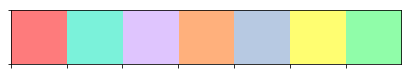

In [11]:
# color stuff
colors = ["salmon pink", "tiffany blue", "light lavender", "peach", "light blue grey", "pastel yellow", "foam green",  ]
#colors = ["orangish","bright lilac","mango","neon red","leather","violet pink","shamrock green","dark orange", "mustard yellow","cerulean","pinkish purple","electric blue", "peach", "light blue grey", "pastel yellow"]
sns.set_palette(sns.xkcd_palette(colors))
sns.palplot(sns.xkcd_palette(colors))

/home/yangxuyun/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 576x576 with 0 Axes>

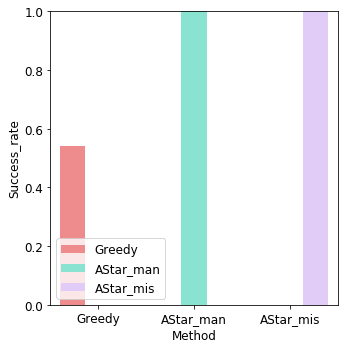

In [12]:
#sns.barplot(x='Setting', y='Success rate', hue="Method", data=sum_data,legend=False)
plt.figure(1,figsize = (8,8))
plt.rcParams.update({'font.size': 12})
success = sns.factorplot(x='Method', y='Success_rate', hue="Method", kind="bar", data=sum_data, legend = False) #, height=6., aspect=1./1.)
success.despine(left=False,top=False,right=False)
plt.legend(loc='upper left',fontsize=12)  #'xx-large'
plt.tick_params(labelsize=12)
ax = plt.gca()
ax.set_ylim([0, 1])

# Iterate through the list of axes' patches
#for p in ax.patches:
#    ax.text(p.get_x() + p.get_width()/2., p.get_height()-p.get_height()/100, '%.02f' % p.get_height(), 
#            fontsize=16, color='black', ha='center', va='bottom')

plt.savefig('./figures/success_rate.jpg')

/home/yangxuyun/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 576x576 with 0 Axes>

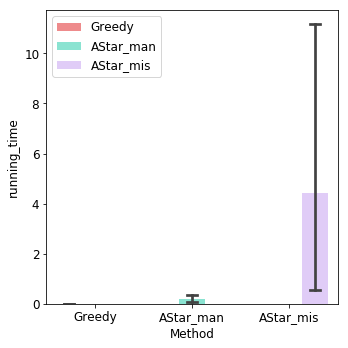

In [18]:
#sns.barplot(x="Setting", y="Connectivity", hue="Method", data=epi_data, capsize =.1)
plt.figure(2,figsize = (8,8))
plt.rcParams.update({'font.size': 12})
connectivity = sns.factorplot(x="Method", y="running_time", hue="Method", kind="bar", data=epi_data, capsize =.1, legend = False) #, height=6., aspect=1./1.)
sns.despine(top=False, right=False) #top=False, right=False
plt.legend(loc='upper left', fontsize=12)
plt.tick_params(labelsize=12)

plt.savefig('./figures/running_time.jpg')

/home/yangxuyun/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 576x576 with 0 Axes>

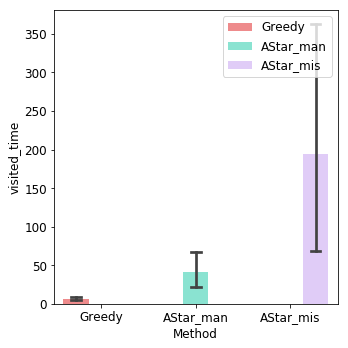

In [15]:
#sns.barplot(x="Setting", y="Efficiency", hue="Method", data=epi_data, capsize =.1)
plt.figure(3,figsize = (8,8))
plt.rcParams.update({'font.size': 12})
efficency = sns.factorplot(x="Method", y="visited_time", hue="Method", kind='bar', data=epi_data, capsize =.1, legend = False) #, height=6., aspect=4./3.)
efficency.despine(top=False, right=False)
plt.legend(loc='upper left', fontsize=12)
plt.tick_params(labelsize=12)

plt.savefig('./figures/visited_time.jpg')